# Preprocessing of the dataset Ghent

## Data cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Materials/Dataset_Sanne_Baeck.csv', sep='\t')
df.head()

,Date,Production
0,26/10/1940,De Vroolijke vrouwtjes van Windsor
1,27/10/1940,De Vroolijke vrouwtjes van Windsor
2,27/10/1940,Het Land der Meisjes
3,3/11/1940,1e Operaconcert
4,3/11/1940,Het Land der Meisjes


In [3]:
# Number of rows
num_rows = df.shape[0]
print("Number of rows in df:", num_rows)

Number of rows in df: 897


In [4]:
#Delete trailing and leading whitespaces.
#df['Image'] = df['Image'].str.strip() 
#df['Collection'] = df['Collection'].str.strip() 
df['Production'] = df['Production'].str.strip() 
#df['Occasion'] = df['Occasion'].str.strip() 

In [5]:
#New boolean column, which indicates whether the performance was part of a multiple bill (True) or not (False).

multiple_bills = []
for row in df['Production']:
    if '+' in str(row):
        multiple_bills.append(True)
    else:
        multiple_bills.append(False)


df['Multiple bill'] = multiple_bills
df['Multiple bill'].value_counts()

False    896
True       1
Name: Multiple bill, dtype: int64

In [6]:
#New column with a random ID voor each performance.

import random
df['Performances_ID'] = random.sample(range(100000, 999999), df.shape[0])

In [7]:
# Cells that include a '+' , i.e. a multiple bill are split so that each row only contains one work.
# Through the Performance_ID we can keep track of those performances that were performed as a multiple bill.

df = df.assign(Production=df.Production.str.split("+")).explode('Production')
df = df.reset_index(drop=True)
df.sample(5)

,Date,Production,Multiple bill,Performances_ID
196,16/10/1941,Marieken van Nijmegem,False,512966
361,8/5/1942,Symfonisch Orkest: Paul Douliez,False,997750
314,6/3/1942,Die Weenersangerknaben,False,226436
817,24/3/1944,Strijkkwartet De Groot,False,660826
257,20/12/1941,De Parelvissers,False,574818


In [8]:
#unique_productions = df['Production'].unique()
#print(unique_productions)

## Normalise spelling

In [9]:
VariatieC = {
"Het Minnebrugje" : "'t Minnebrugje T' Minnebrugje Het Minnebrugsken Het minnebrugje Minnebrugje",
"De Blauwe Donau" : "De Schone Blauwe Donau",
"Het Arendsnest" : "Arendsnest",
"Bohème" : "Boheme Die Bohème Die Boheme",
"De Bruid der Zee" : "Bruid der Zee",
"Het Kind" : "Das Kind",
"De Verkochte Bruid" : "Die Verkaufte Braut",
"Czaar en Timmerman" : "Csaar en Timmerman Zar und Zimmermann Tsaar en Timmerman",
"De Verzonken Klok" : "De Verzonkene Klok",
"De Bedelstudent" : "De Arme student",
"Suite n°7" : "Suite 7",
"Anne-Marie" : "Anna-Marie",
"De Doode Oogen" : "De Dode Ogen",
"De Doode Stad" : "De Dode Stad",
"De Koningin van Saba" : "De Koningin van Saaba",
"De Lustige Boer" : "De Lustige Broeder Lustige Boer",
"De Lustige Oorlog" : "De Vrolijke Oorlog",
"De Lustige Vrouwtjes van Windsor" : "De Vroolijke vrouwtjes van Windsor The Merry Wives of Windsor De Vrolijke Vrouwtjes van Windsor Lustige Vrouwtjes van Windsor",
"De Meesterzangers van Nurenberg" : "Die Meistersinger von Nürnberg Die Meistersing von Nürnberg De Meesterzangers van Neurenberg De Meesterzanger De Meesterzangers De Meesterzangers van Nuremberg De Meesterzangers van Nürnberg", 
"De Tooverfluit" : "Tooverfluit Tooverfluit Die Zauberflöte",
"De Tragedie van Salomé" : "De tragedie van Salomé Salome",
"De Twee Medaillons" : "De Tweede Medaillons",
"De Vestale" : "Vestale",
"De Vrijschutter" : "Vrijschutter Der Freischütz",
"De Walkure" : "De Walküre La Walkyrie Die Walkure Die Walküre Die Walkuere",
"De Zeven Hoofdzonden" : "de Zeven Hoofdzonden",
"De Drie Houten Poppen" : "De drie Houten Poppen",
"De Evangelieman" : "Die Evangelieman",
"Don Juan" : "Don Giovanni",
"Vier Canzoni" : "4 canzoni",
"De Draaimolen" : "Draaimolen",
"Driemeisjeshuis" : "Het Driemeisjeshuis",
"Een Nacht te Grenada" : "Eeen Nacht te Grenada",
"Ein Walzertraum" : "Walzertaum Walsdroom",
"Hansje en Grietje" : "Hans en Grietje Hansel en Gretel",
"Herbergprinses" : "Herbergrprinses Herberprinses",
"Het Rijngoud" : "Rijngoud Rheingold",
"Het Rozemarijntje" : "Rosemarijntje Rozemarijntje",
"Winternachtsdroom" : "Het Winternachtsdroom",
"Zeevolk" : "Het Zeevolk",
"Pan" : "Ballet Pan",
"Hoffmann's Vertellingen" : "Hoffmann's Vertellingenen",
"Jean-Marie" : "Jose Maria Jean Marie Marie José",
"Jozef in Egypte" : "Josef in Egypte",
"De Kinderen der Zee": "Kinderen der Zee",
"Liefdetoover" : "Liefde Toover",
"Marieke van Nijmegem" : "Marieke van Nymwegen Marieke van Nijmegen Marike van Nymegem",
"Orpheus' Dood" : "Orpheus's Dood",
"Paljas" : "Pagliacci Der Bajazzo Bajazzo",
"Parisina" : 'Parsina',
"Quinten Massijs" : "Quinten Massys Quinten Metsys Quinten-Massijs Quinten-Massys",
"Reeks van Oud-Grieksche Dansen" : "Reeks van Oud-Griekscge Dansen",
"Reinaert de Vos" : "Reinart de Vos Reinaert de vos",
"De Rijndwergen": "Rijndwergen",
"Tannhauser" : "Tannhäuser",
"Wiener Sängerknaben" : "Die Weenersangerknaben",
"Theroigne de Mericout" : "Theroigne De Mericourt Theroigne de Mericoux Théroigne de Méricourt Théroigne de Méricout",
"Toespraak van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn" : "Toespraal van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn",
"Tweede Dansenreeks" : "Tweede dansreeks",
"Tristan en Isolde" : "Tristan und Isolde",
"Faust" : "Faust (Margarethe)",
"Francesca" : "Francesca (De Bloeiende Weg)",
"Traviata" : "La Traviata",
"Thijl Uilenspiegel" : "Tijl Uilenspiegel",
"Het Land van den Glimlach" : "Das Land des Lächelns Het Land van de Glimlach",
"De Rozenkavalier" : "Der Rosenkavalier",
"De Vledermuis" : "Die Fledermaus",
"De Vliegende Hollander" : "Der fliegende Holländer",
"Mächte des Lebens": "Levensmachten",
"Der Heiratsspiegel" : "De Spiegel van het Huwelijk",
"Lakme" : "Lakmé",
"Boris Godounow" : "Boris Godouwnow",
"De Glasblazer" : "Der Glasbläser",
"Paris in Verlegenheid" : "\"Paris\" in Verlegenheid", 
"Iphigénie en Tauride" : "Iphigeneia in Tauris",
"Aïda" : "Aida",
"De Tsarewitsch" : "Tsarewitsch",
"Rhapsodie N. 2" : "Rhapsodie Nr 2 2e Rhapsodie",
"André Chénier" : "Andre Chenier Andrea Chenier",
"Götterdämmerung" : "Godendeemstering",
"Prinses Zonneschijn" : "Prinzessin Sonnenschein",
"Ariane en Blauwbaard" : "Ariane et Barbe Bleue Ariane et Barbe-Bleue",
"De Parelvisschers" : "Die Perlenfischer De Parelvissers",
"De Zigeunerbaron" : "Der Zigeunerbaron",
"De Graaf van Luxemburg" : "Der Graf von Luxemburg",
"Elsje Zevenschoon" : "Elschen Siebenschön",
"Romeo en Julia" : "Romeo und Julia",
"De Lustige Weduwe" : "Die Lustige Witwe",
"De Barbier van Sevilla" : "Der Barbier von Sevilla",
"Het Meisje van Zaventem" : "Das Mädchen von Zaventem",
"Tombeleene": "Ballet Tambolene",
"Zwaanhild" : "Schwanhild",
"De Vogelhandelaar" : "Der Vogelhändler",
"Dansvertooning II" : "Tanzvorstellung II",
"De Sylphiden" : "20 minuten ballet Sylphiden",
"Visioen" : "Vision",
"Frederika" : "Friederike",
"Carnaval" : "Ballet Carnaval",
"De Koekoek" : "Koekoek 20 minuten ballet Koekoek",
"Figaro’s Bruiloft" : "Le Nozze di Figaro Figaros Hochzeit Figaro's Hoekzeit",
"De Ontvoering uit het Serail" : "Die Entführung aus dem Serail Die Entfürung aus dem Serail",
"Zwaargewicht" : "Zwaargewicht ( of De eer van't Land)"
}

In [10]:
#create functions that iterates over the items in the dictionary and returns the key if the title is in the values.
#if it is not in the values, there was not spelling variation for this title and the title is returned.
def clean_titles (row):

    for key, values in VariatieC.items():
        if str(row) in str(values):
            #print('it is in the values')
            return key
        elif row == key:
            return key
    else:
        return row   

In [11]:
#Test it on some variations.

a = "Hoffman's Vertellingen"
b = "Tannhäuser"
c = 'Madame Butterfly'

print(clean_titles(a))
print(clean_titles(b))
print(clean_titles(c))

Hoffman's Vertellingen
Tannhauser
Madame Butterfly


In [12]:
#Function is now applied to the entire dataset. The normalised spelling is gathered in a new column called 'Genormaliseerde titel'.
df['Normalised title'] = df['Production'].apply(clean_titles)

In [13]:
df.head()

,Date,Production,Multiple bill,Performances_ID,Normalised title
0,26/10/1940,De Vroolijke vrouwtjes van Windsor,False,221650,De Lustige Vrouwtjes van Windsor
1,27/10/1940,De Vroolijke vrouwtjes van Windsor,False,373227,De Lustige Vrouwtjes van Windsor
2,27/10/1940,Het Land der Meisjes,False,278393,Het Land der Meisjes
3,3/11/1940,1e Operaconcert,False,207120,1e Operaconcert
4,3/11/1940,Het Land der Meisjes,False,886199,Het Land der Meisjes


In [14]:
#delete all leading and trailing whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [15]:
#norm_titles = df['Normalised title'].unique()
#print(norm_titles)

## Add metadata

Load dictionary-formatted txt-file containing additional metadata.
- key = normalised title
- value [0] = original title
- value [1] = composer
- value [2] = year of first performance
- value [3] = original title
- value [4] = genre (not used in the thesis)


In [16]:
with open('../Materials/META2.txt','r', encoding = 'UTF8') as inf:
    Metadata = eval(inf.read())

#load the metadata

In [17]:
#Check if the txt-file is formatted correctly
output = []
for key, values in Metadata.items():
    if len(values) != 5:
       output.append(values)
       print(output)

if len(output) == 0:
    print('Looking good!')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#Define a function that identifies the original language based on the metadata.

def add_taal (row):
    for key, values in Metadata.items():
        if row == key:
            return values[0]
    else:
        return 'N/A'

#try it out.

a = "Madame Butterfly"
b = "Tannhauser"
c = "Quinten Massijs"

print(add_taal(a))
print(add_taal(b))
print(add_taal(c))

ITA
DUI
NL


In [19]:
#Define a function that identifies the composer based on the metadata.

def add_composer (row):
    for key, values in Metadata.items():
        if row == key:
            return values[1]
    else:
        return 'N/A'
    
#try it out.

print(add_composer(a))
print(add_composer(b))
print(add_composer(c))

Giacomo Puccini
Richard Wagner
Emile Wambach


In [20]:
#Define a function that identifies the year of the first performance based on the metadata.

def add_premiere (row):
    for key, values in Metadata.items():
        if row == key:
            return values[2]
    else:
        return 'N/A'

print(add_premiere(a))
print(add_premiere(b))
print(add_premiere(c))

1904
1845
1899


In [21]:
#Define a function that identifies the year of the original title based on the metadata.

def add_oortitel (row):
    for key, values in Metadata.items():
        if row == key:
            return values[3]
    else:
        return 'N/A'


print(add_oortitel(a))
print(add_oortitel(b))
print(add_oortitel(c))

Madama Butterfly
Tannhäuser
Quinten Massys


In [22]:
#Define a function that identifies the year of the genre based on the metadata.

def add_genre (row):
    for key, values in Metadata.items():
        if row == key:
            return values[4].lower()
    else:
        return 'N/A'


print(add_genre(a))
print(add_genre(b))
print(add_genre(c))

opera seria
romantische oper
lyrisch drama


In [23]:
#add the metadata as new columns in the dataframe.

df['Original language'] = df['Normalised title'].apply(add_taal)
df['Composer'] = df['Normalised title'].apply(add_composer)
df['Original premiere'] = df['Normalised title'].apply(add_premiere)
df['Original title'] = df['Normalised title'].apply(add_oortitel)
df['genre'] = df['Normalised title'].apply(add_genre)
df.sample(5)

,Date,Production,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre
148,5/6/1941,De Vogelhandelaar,False,492061,De Vogelhandelaar,DUI,Carl Zeller,1891,Der Vogelhändler,operette
603,16/5/1943,De Rozenkavalier,False,677999,De Rozenkavalier,DUI,Richard Strauss,1911,Der Rosenkavalier,comic-fantasy
268,1/1/1942,Orpheus,False,576903,Orpheus' Dood,FR,Jacques Offenbach,1858,Orphée aux enfers,operetta
82,2/3/1941,De Zigeunerbaron,False,180536,De Zigeunerbaron,DUI,Johann Strauss,1885,Der Zigeunerbaron,operetta
421,8/10/1942,Tosca,False,556971,Tosca,ITA,Giacomo Puccini,1900,Tosca,verismo opera


## Additional preprocessing

In [24]:
#Convert the Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [25]:
# Obtain the season. An operatic season runs (approximately) from September to May
def get_season(date):
    year = date.year
    if date.month >= 9:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"


df['Season'] = df['Date'].apply(get_season)

In [26]:
#Remove irrelevant pages, i.e. pages where both the production and the date of performance are missing

old_len = len(df)
df2 = df.dropna(subset=['Production','Date'])
print(f'{old_len - len(df2)} of {old_len} records removed')

8 of 898 records removed


In [27]:
#Remove duplicate, i.e. cases in which the production and date are the same.

all_dups = len(df2)
df2 = df2.drop_duplicates(subset=['Production', 'Date'])
print(f'{all_dups - len(df2)} of {all_dups} records removed! {len(df2)} records remain')

28 of 890 records removed! 862 records remain


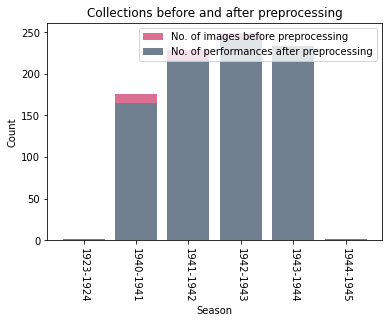

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

counts1 = df['Season'].value_counts()[df2['Season'].unique()].sort_index()
counts2 = df2['Season'].value_counts().sort_index()

counts2 = counts2.sort_index()
x2 = counts2.index
y2 = counts2.values

counts1 = counts1.sort_index()

# Generate x and y data for the bar plot
x = counts1.index
y = counts1.values

# Plotting the bar plots
ax.bar(x, y, color='palevioletred', label='No. of images before preprocessing')
ax.bar(x2, y2, color='slategrey', label='No. of performances after preprocessing')

# Adding ticks and labels to the x-axis
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Collections before and after preprocessing')

# Display the bar plots
plt.legend()
plt.show()

In [29]:
#Save the new dataset
#df2.to_csv('../Materials/Cleaned_DatasetGENT.csv', encoding = 'utf-8')